<a href="https://colab.research.google.com/github/geddadasuresh84326/deep-learning-ann/blob/main/dl_ann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow
print(tensorflow.__version__)

2.12.0


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/aps_data.csv")

In [ ]:
df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,6,0,0,0,0,0,0,0,0,...,26,8,26,52,0,0,0,0,0,0
1,neg,90,0,0,66,0,0,0,0,0,...,1268,526,554,300,118,260,0,0,0,0
2,neg,30,na,16,14,0,0,0,0,0,...,480,84,74,50,46,0,0,0,0,0
3,neg,444,na,14,12,0,0,0,0,0,...,1614,1144,3598,2460,1258,8524,110,0,0,0
4,neg,82,na,12,10,0,0,0,0,1464,...,1010,132,310,56,92,1292,0,0,0,0


In [ ]:
df.shape

(1413, 171)

In [ ]:
pd.DataFrame(df.isnull().sum().sort_values(ascending = False)).rename(columns= {0:"Null values count"})

,Null values count
by_000,1
cs_003,1
cn_009,1
co_000,1
cp_000,1
...,...
ag_000,0
ag_001,0
ag_002,0
ag_003,0


In [ ]:
df.isnull().sum().sum()

160

In [ ]:
df = df.replace("na",np.nan)

In [ ]:
pd.options.display.max_rows = 1000

In [ ]:
df.isnull().sum()

class        0
aa_000       0
ab_000    1074
ac_000      80
ad_000     329
ae_000      53
af_000      53
ag_000      19
ag_001      19
ag_002      19
ag_003      19
ag_004      20
ag_005      20
ag_006      20
ag_007      20
ag_008      20
ag_009      20
ah_000      18
ai_000      17
aj_000      17
ak_000     104
al_000      20
am_0        17
an_000      20
ao_000      17
ap_000      20
aq_000      17
ar_000      56
as_000      17
at_000      17
au_000      17
av_000      54
ax_000      54
ay_000      20
ay_001      20
ay_002      20
ay_003      20
ay_004      20
ay_005      20
ay_006      20
ay_007      20
ay_008      20
ay_009      20
az_000      20
az_001      20
az_002      20
az_003      20
az_004      20
az_005      20
az_006      20
az_007      20
az_008      20
az_009      20
ba_000      20
ba_001      20
ba_002      20
ba_003      20
ba_004      20
ba_005      20
ba_006      20
ba_007      20
ba_008      20
ba_009      20
bb_000      18
bc_000      56
bd_000      56
be_000    

In [ ]:
df.isnull().sum().sum()

19960

In [ ]:
## filling missing values with mean
for feature in [feature for feature in df.columns if feature not in ["class"]]:
  df[feature] = df[feature].fillna(df[feature].median())


In [ ]:
df.isnull().sum().sum()

0

In [ ]:
## splitting data
X = df.drop("class",axis = 1)
y = df["class"]

In [ ]:
y.head()

0    neg
1    neg
2    neg
3    neg
4    neg
Name: class, dtype: object

In [ ]:
X.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413 entries, 0 to 1412
Data columns (total 170 columns):
 #    Column  Non-Null Count  Dtype 
---   ------  --------------  ----- 
 0    aa_000  1413 non-null   int64 
 1    ab_000  1413 non-null   object
 2    ac_000  1413 non-null   object
 3    ad_000  1413 non-null   object
 4    ae_000  1413 non-null   object
 5    af_000  1413 non-null   object
 6    ag_000  1413 non-null   object
 7    ag_001  1413 non-null   object
 8    ag_002  1413 non-null   object
 9    ag_003  1413 non-null   object
 10   ag_004  1413 non-null   object
 11   ag_005  1413 non-null   object
 12   ag_006  1413 non-null   object
 13   ag_007  1413 non-null   object
 14   ag_008  1413 non-null   object
 15   ag_009  1413 non-null   object
 16   ah_000  1413 non-null   object
 17   ai_000  1413 non-null   object
 18   aj_000  1413 non-null   object
 19   ak_000  1413 non-null   object
 20   al_000  1413 non-null   object
 21   am_0    1413 non-null   object
 22 

In [ ]:
y = pd.get_dummies(y,drop_first = True)

In [ ]:
y.head()

,pos
0,0
1,0
2,0
3,0
4,0


In [ ]:
## train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

In [ ]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(1130, 170) (1130, 1) (283, 170) (283, 1)


In [ ]:
## scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
X_train_tr = scaler.fit_transform(X_train)
X_test_tr = scaler.transform(X_test)

In [ ]:
## importing keras libraries and packages
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [ ]:
print(Sequential)

<class 'keras.engine.sequential.Sequential'>


In [ ]:
classifier = Sequential()

classifier.add(Dense(units = 10,kernel_initializer = "he_uniform",activation = "relu",input_dim = 170))

classifier.add(Dense(units = 10,kernel_initializer = "he_uniform",activation = "relu",))

classifier.add(Dense(units = 1,kernel_initializer = "glorot_uniform",activation = "sigmoid"))

In [ ]:
classifier.compile(optimizer="adam",loss= "binary_crossentropy",metrics=["accuracy"])

In [ ]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                1710      
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,831
Trainable params: 1,831
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_history = classifier.fit(X_train_tr,y_train,batch_size=10,epochs=20,validation_split=0.25)

Epoch 1/20
85/85 [==============================] - 7s 6ms/step - loss: 0.6975 - accuracy: 0.7273 - val_loss: 0.5112 - val_accuracy: 0.9647
Epoch 2/20
85/85 [==============================] - 0s 5ms/step - loss: 0.2890 - accuracy: 0.9740 - val_loss: 0.2637 - val_accuracy: 0.9717
Epoch 3/20
85/85 [==============================] - 0s 5ms/step - loss: 0.1043 - accuracy: 0.9906 - val_loss: 0.1597 - val_accuracy: 0.9788
Epoch 4/20
85/85 [==============================] - 0s 4ms/step - loss: 0.0594 - accuracy: 0.9941 - val_loss: 0.1305 - val_accuracy: 0.9859
Epoch 5/20
85/85 [==============================] - 0s 5ms/step - loss: 0.0433 - accuracy: 0.9917 - val_loss: 0.1098 - val_accuracy: 0.9894
Epoch 6/20
85/85 [==============================] - 0s 5ms/step - loss: 0.0273 - accuracy: 0.9965 - val_loss: 0.1089 - val_accuracy: 0.9929
Epoch 7/20
85/85 [==============================] - 0s 5ms/step - loss: 0.0221 - accuracy: 0.9953 - val_loss: 0.1536 - val_accuracy: 0.9717
Epoch 8/20
85/85 [==

In [ ]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
model_history.history["loss"]

[0.6974666118621826,
 0.28897756338119507,
 0.10430105030536652,
 0.05937088653445244,
 0.04333193972706795,
 0.027262749150395393,
 0.022085916250944138,
 0.018138514831662178,
 0.013250346295535564,
 0.011115077883005142,
 0.009154414758086205,
 0.0077965352684259415,
 0.006796629633754492,
 0.005865277722477913,
 0.00504923053085804,
 0.0046647097915410995,
 0.00402472261339426,
 0.003654282074421644,
 0.0033068517223000526,
 0.002897735685110092]

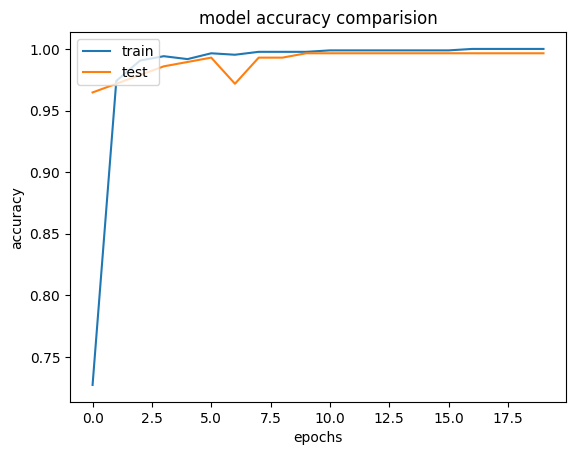

In [ ]:
plt.plot(model_history.history["accuracy"])
plt.plot(model_history.history["val_accuracy"])
plt.title("model accuracy comparision")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend(["train","test"],loc= "upper left")
plt.show()

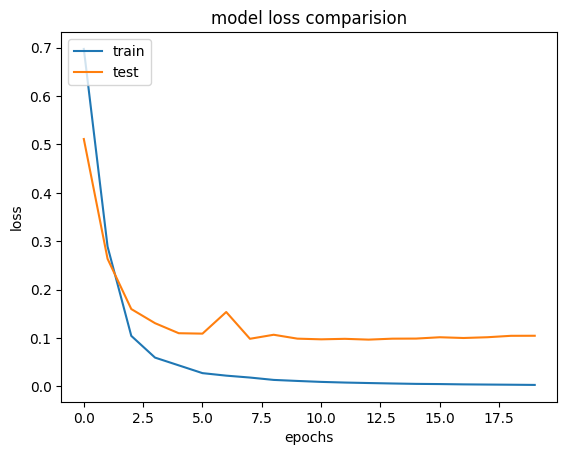

In [ ]:
plt.plot(model_history.history["loss"])
plt.plot(model_history.history["val_loss"])
plt.title("model loss comparision")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(["train","test"],loc= "upper left")
plt.show()

In [ ]:
y_pred = classifier.predict(X_test_tr)

9/9 [==============================] - 0s 2ms/step


In [ ]:
y_pred

array([[7.84918293e-02],
       [3.64137195e-05],
       [1.43086145e-05],
       [1.47665734e-04],
       [1.51887371e-05],
       [1.21626050e-04],
       [3.50655646e-05],
       [4.98951972e-01],
       [2.99964086e-05],
       [5.12845979e-08],
       [9.15672064e-01],
       [3.54843032e-05],
       [2.43806717e-05],
       [1.29534688e-04],
       [1.68582163e-04],
       [1.68614322e-04],
       [7.53020431e-05],
       [1.60905311e-03],
       [1.82896692e-05],
       [4.28802945e-04],
       [3.04602527e-05],
       [4.49271793e-05],
       [1.64905941e-05],
       [4.77926769e-05],
       [1.90622122e-05],
       [1.54177003e-04],
       [4.29071188e-05],
       [1.44382166e-05],
       [1.50727546e-05],
       [4.56578971e-04],
       [9.99991536e-01],
       [7.54856665e-05],
       [7.78233007e-05],
       [2.07739024e-04],
       [1.00000000e+00],
       [1.71402662e-05],
       [5.18254586e-04],
       [1.51464948e-04],
       [1.12591730e-03],
       [1.47416386e-05],


In [ ]:
y_pred = y_pred>0.5


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test,y_pred)

array([[275,   4],
       [  2,   2]])

In [ ]:
# saving model
import os,time


In [ ]:
def saveModel_path(model_dir="SAVED_MODELS"):
  os.makedirs(model_dir,exist_ok=True)
  filename = time.strftime("Model_%Y_%m_%d_%H_%M_%S_.h5")
  model_path = os.path.join(model_dir,filename)
  print(f"Your model saved in : {model_path}")
  return model_path

In [ ]:
classifier.save(saveModel_path())

Your model saved in : SAVED_MODELS/Model_2023_09_06_17_53_38_.h5


In [ ]:
# hyperparameter tuning with keras tuner



!pip install keras-tuner --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 1.3 MB/s eta 0:00:00


In [ ]:
from kerastuner.tuners import RandomSearch

<ipython-input-40-94471a811b41>:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [ ]:
def build_model(hp):
  model = Sequential()
  model.add(Dense(32,kernel_initializer = "he_uniform",activation='relu',input_dim=170))
  model.add(Dense(32,kernel_initializer = "he_uniform",activation='relu'))
  model.add(Dense(1,activation='sigmoid'))
  optimizer = hp.Choice("optimizer",values=["adam","sgd","rmsprop","adadelta"])
  model.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])

  return model

In [ ]:
tuner = RandomSearch(build_model,objective='val_accuracy',max_trials=5,directory = "project",project_name = "aps-fault")

In [ ]:
tuner.search(X_train_tr,y_train,validation_data=(X_test_tr,y_test),epochs = 5)

Trial 4 Complete [00h 00m 05s]
val_accuracy: 0.9858657121658325

Best val_accuracy So Far: 0.9858657121658325
Total elapsed time: 00h 00m 16s


In [ ]:
tuner.get_best_hyperparameters()[0].values

{'optimizer': 'rmsprop'}

In [ ]:
my_model = tuner.get_best_models(num_models=1)[0]

In [ ]:
my_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                5472      
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 6,561
Trainable params: 6,561
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras import optimizers
def build_model(hp):
  model = Sequential()
  for i in range(hp.Int('num_layers',2,20)):
    model.add(Dense(units = hp.Int("units_"+ str(i),
                                   min_value = 32,
                                   max_value = 512,
                                   step = 32)))
    model.add(Dense(1,activation="sigmoid"))
    model.compile(optimizer = optimizers.Adam(
        hp.Choice('learning_rate',[1e-2,1e-3,1e-4])),
                  loss = 'binary_crossentropy',
                  metrics = ['accuracy'])
    return model


In [ ]:
tuner_2 = RandomSearch(build_model,objective='val_accuracy',max_trials=5,directory = "project1",project_name = "aps-fault1")

In [ ]:
tuner_2.search(X_train_tr,y_train,validation_data=(X_test_tr,y_test),epochs = 5)

Trial 5 Complete [00h 00m 06s]
val_accuracy: 0.9752650260925293

Best val_accuracy So Far: 0.9752650260925293
Total elapsed time: 00h 00m 31s


In [ ]:
tuner_2.get_best_hyperparameters()[0].values

{'num_layers': 12, 'units_0': 192, 'learning_rate': 0.01}

In [ ]:
my_model = tuner_2.get_best_models(num_models=1)[0]

In [ ]:
my_model.summary()

ValueError: ignored